In [1]:
import rasterio
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:

def perform_kl_transform(image_path, select_bands,n_components):
    with rasterio.open(image_path) as src:
        # 读取所有波段数据
        bands = src.read(indexes = select_bands)
        # 处理极端值
        bands[bands>100] = np.median(bands)
        # 将波段数据重塑为二维数组 (pixels, bands)
        n_bands, height, width = bands.shape
        reshaped_data = bands.reshape(n_bands, height * width).T

        # 执行PCA (K-L变换)
        pca = PCA(n_components=n_components)
        transformed_data = pca.fit_transform(reshaped_data)

        # 将结果重塑回图像格式
        transformed_images = transformed_data.T.reshape((n_components, height, width))

        return transformed_images, src.transform, src.crs



In [3]:
# 输入多波段TIF文件路径和输出路径
input_path = r'F:\cache_data\tif_file_sentinel\ky\ky_bands14.tif'
output_path = r'F:\cache_data\tif_file_texture\ky\multi_bands\ky_bands14_pca.tif'
select_bands = [1,2,3,4,5,6,7,8,9,10,11,12]
n_components = 2
transformed_images = perform_kl_transform(input_path, select_bands, n_components)

In [4]:
# 保存为tif文件

with rasterio.open(
    output_path,
    'w',
    driver='GTiff',
    height=transformed_images[0].shape[1],
    width=transformed_images[0].shape[2],
    count=n_components,
    dtype=transformed_images[0].dtype,
    crs=transformed_images[2],
    transform=transformed_images[1]
) as dst:
    for i in range(n_components):
        dst.write(transformed_images[0][i], i + 1)

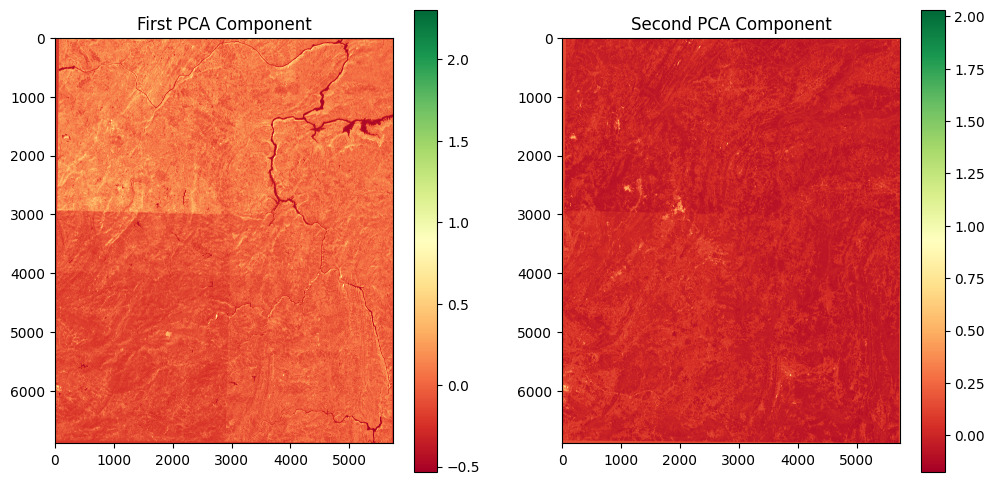

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# First KL Component
ax1 = axes[0]
im1 = ax1.imshow(transformed_images[0][0], cmap='RdYlGn')
ax1.set_title('First PCA Component')
plt.colorbar(im1, ax=ax1)

# Second KL Component
ax2 = axes[1]
im2 = ax2.imshow(transformed_images[0][1], cmap='RdYlGn')
ax2.set_title('Second PCA Component')
plt.colorbar(im2, ax=ax2)

plt.show()